In [1]:
from gradient_descent import Gradient_Descent, generate_gif
import numpy as np, matplotlib.pyplot as plt, os, pandas as pd, shutil, imageio
from logistic_regression import logistic_gradient_f, log_loss, logistic_link
from sklearn.metrics import roc_curve

In [2]:
### let's define X of shape (n, 2) and play around a bit, to see if it's working
np.random.seed(1)
n = 1_000
X = np.concatenate((np.ones((n, 1)), np.random.randn(n).reshape((-1, 1))), axis=1)
y = np.random.binomial(n=1, p=1/2, size=n)
y[np.where(X[:, 1] > 0.5)] = 1
onetozero = np.where( ( X[:, 1] < 0.5 ) & ( (y==1).reshape(-1, ) ) )[0]
y[onetozero] = np.random.binomial(n=1, p=1/2, size=onetozero.size)
X[np.where(y==1), 1] += 3.3
y=y.reshape(-1, 1)

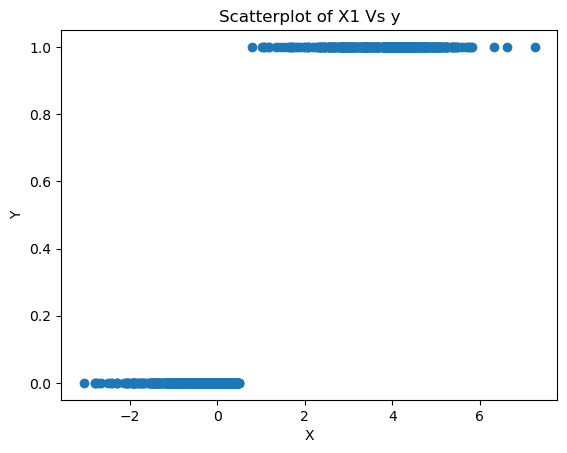

In [3]:
plt.title('Scatterplot of X1 Vs y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:, 1], y)
plt.show()

In [4]:
init_weights = np.zeros((2, 1))
# init_weights = np.array([5., 5.]).reshape(-1, 1)

w = Gradient_Descent(
    weights=init_weights,
    gradient_function=logistic_gradient_f,
    epsilon=1e-2,
    link=logistic_link,
)

w.fit(X, y, alpha=8e-1)

Reached convergence after 159 steps.


array([[-3.36122807],
       [ 3.03375789]])

In [5]:
generate_gif(X, y, log_loss, w, gif_name='logistic_regression_gradient_descent')